##Part A: Vectors and Matrices

### 1. (a) Dot product

In [ ]:
import numpy as np

v1 = np.array([3, -2, 5])
v2 = np.array([1, 4, -1])

dot_product = np.dot(v1, v2)

print(f"The dot product of v1 and v2 is: {dot_product}")


The dot product of v1 and v2 is: -10


### (b) Norm of each vector

In [ ]:
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)

print(f"The norm of v1 is: {norm_v1}")
print(f"The norm of v2 is: {norm_v2}")


The norm of v1 is: 6.164414002968976
The norm of v2 is: 4.242640687119285


### (c) Angle (in degrees) between them

In [ ]:
import numpy as np
angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2))
angle_deg = np.degrees(angle_rad)

print(f"The angle between v1 and v2 is: {angle_deg} degrees")


The angle between v1 and v2 is: 112.4799158054635 degrees


### 2. Multipliction of matrices A and b

In [ ]:
A = np.array([[2, -1, 0],
              [1, 3, 2],
              [0, -2, 1]])
b = np.array([[1],
              [4],
              [-3]])

# Product of A and b
result = np.dot(A, b)

print("The product of A and b is:")
result

# Interpretation:
# The result is a 3x1 vector, which represents a linear combination of the columns of A.
# Each element of the resulting vector corresponds to the dot product of a row of A with vector b.
# For example, the first element of the result ( -2) is the dot product of the first row of A ([2, -1, 0]) and b ([1, 4, -3]): 2*1 + (-1)*4 + 0*(-3) = -2.


The product of A and b is:


array([[ -2],
       [  7],
       [-11]])

### 3.(a) Determinant

In [ ]:
import numpy as np
determinant_A = np.linalg.det(A)

print(f"The determinant of matrix A is: {determinant_A}")


The determinant of matrix A is: 15.0


###(b) Rank

In [ ]:
rank_A = np.linalg.matrix_rank(A)

print(f"The rank of matrix A is: {rank_A}")


The rank of matrix A is: 3


### (c) Inverse of matrix A

In [ ]:
inverse_A = np.linalg.inv(A)

print("The inverse of matrix A is:")
inverse_A


The inverse of matrix A is:


array([[ 0.46666667,  0.06666667, -0.13333333],
       [-0.06666667,  0.13333333, -0.26666667],
       [-0.13333333,  0.26666667,  0.46666667]])

## Part B: Systems of Equations

### Question 1

In [ ]:
import numpy as np
# Define the coefficient matrix A and the constant vector b
A = np.array([[1, 2, 3],
              [2, 3, 1],
              [3, 1, 2]])
b = np.array([9, 8, 7])

# Solve for x using numpy.linalg.solve
x = np.linalg.solve(A, b)

print("Solution vector x:", x)

# Verify the solution
# Substitute the solution back into the original equations
print("\nVerification:")

equation1 = x[0] + 2*x[1] + 3*x[2]
equation2 = 2*x[0] + 3*x[1] + x[2]
equation3 = 3*x[0] + x[1] + 2*x[2]


print(f"Equation 1: {equation1}")  # should be 9
print(f"Equation 2: {equation2}")  # should be 8
print(f"Equation 3: {equation3}")  # should be 7


Solution vector x: [0.66666667 1.66666667 1.66666667]

Verification:
Equation 1: 9.0
Equation 2: 8.0
Equation 3: 7.0


### Question 2

In [ ]:
import numpy as np
import scipy.linalg
# Define the coefficient matrix A and the constant vector b
A = np.array([[1, 2, 3],
              [2, 3, 1],
              [3, 1, 2]])
b = np.array([9, 8, 7])

# Perform LU decomposition
P, L, U = scipy.linalg.lu(A)

# Solve Ly = Pb
y = np.linalg.solve(L, np.dot(P,b))

# Solve Ux = y
x = np.linalg.solve(U, y)

print("Solution vector x (using LU decomposition):", x)

# Verification (same as before)
print("\nVerification:")

equation1 = x[0] + 2*x[1] + 3*x[2]
equation2 = 2*x[0] + 3*x[1] + x[2]
equation3 = 3*x[0] + x[1] + 2*x[2]

print(f"Equation 1: {equation1}")  # should be 9
print(f"Equation 2: {equation2}")  # should be 8
print(f"Equation 3: {equation3}")  # should be 7


Solution vector x (using LU decomposition): [0.66666667 1.66666667 1.66666667]

Verification:
Equation 1: 9.0
Equation 2: 8.0
Equation 3: 7.0


## Part C : Eigenvalues and Diagonalization

### Question 1

In [ ]:
import numpy as np

C = np.array([[4, -2],
              [1, 1]])

eigenvalues, eigenvectors = np.linalg.eig(C)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Verify the result
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigenvector = eigenvectors[:, i]

    # Compute Cv
    Cv = np.dot(C, eigenvector)

    # Compute λv
    lambdav = eigenvalue * eigenvector

    print(f"\nVerification for eigenpair {i+1}:")
    print("Cv:", Cv)
    print("λv:", lambdav)
    print("Are they close?", np.allclose(Cv, lambdav)) # Use allclose for floating point comparison


Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

Verification for eigenpair 1:
Cv: [2.68328157 1.34164079]
λv: [2.68328157 1.34164079]
Are they close? True

Verification for eigenpair 2:
Cv: [1.41421356 1.41421356]
λv: [1.41421356 1.41421356]
Are they close? True


### Question 2

In [ ]:
import numpy as np
# Find matrices P and D such that C = PDP^(-1)
P = eigenvectors
D = np.diag(eigenvalues)

#Verify the result
C_reconstructed = P @ D @ np.linalg.inv(P)

print("\nOriginal Matrix C:\n", C)
print("\nReconstructed Matrix C:\n", C_reconstructed)
print("\nAre they close?", np.allclose(C, C_reconstructed))



Original Matrix C:
 [[ 4 -2]
 [ 1  1]]

Reconstructed Matrix C:
 [[ 4. -2.]
 [ 1.  1.]]

Are they close? True


## Bonus

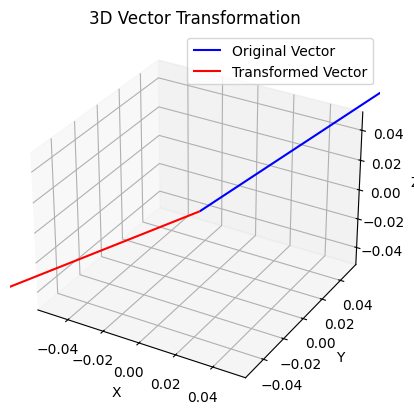

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scaling matrix
scaling_matrix = np.array([[2, 0, 0],
                           [0, 0.5, 0],
                           [0, 0, 1.5]])

# Define the original vector
original_vector = np.array([1, 1, 1])

# Apply the transformation
transformed_vector = np.dot(scaling_matrix, original_vector)


# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original vector
ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')

# Plot the transformed vector
ax.quiver(0, 0, 0, transformed_vector[0], transformed_vector[1], transformed_vector[2], color='r', label='Transformed Vector')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
ax.legend()

# Add a title
ax.set_title('3D Vector Transformation')
plt.show()
